In [1]:
%pip install git+https://github.com/nndt-team/nndt.git
%pip install ipyvtklink

Defaulting to user installation because normal site-packages is not writeable
  Cloning https://github.com/nndt-team/nndt.git to /tmp/pip-req-build-y2xtlhhv
  Running command git clone --filter=blob:none --quiet https://github.com/nndt-team/nndt.git /tmp/pip-req-build-y2xtlhhv
  Resolved https://github.com/nndt-team/nndt.git to commit 667e7d3d777357d13c60e781863e05d59cb2a7dc
  Preparing metadata (setup.py) ... done
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [2]:
## \([0-9].?[0-9]*,\s?[0-9].?[0-9]*,\s?[0-9].?[0-9]*\)

In [3]:
import nndt
import nndt.space2 as spc
from nndt.datasets import ACDC

nndt.__version__

'0.0.3rc6'

In [4]:
import pyvista as pv
import jax.numpy as jnp

Load data

In [5]:
ACDC().load()

Downloading...
From: https://drive.google.com/uc?export=download&id=1UzC2WPkjMQSxzI5sj1rMT47URuZbQhYb
To: /home/simus/repos/github/nndt/tests_manual/.datasets/ACDC_5/temp.7z
100%|██████████| 9.01M/9.01M [00:00<00:00, 18.0MB/s]


Loading complete


'./.datasets/ACDC_5/'

In [6]:
space = spc.load_from_path("./.datasets/ACDC_5")

In [7]:
test_case = (
    (0.1, 0.1, 0.1),
    (0.0, 0.0, 0.0),
    (0.0, 0.1, 0.1),
    (0.1, 0.0, 0.1),
    (0.1, 0.0, 0),
    (0.1, 344.1, 0.1),
    (-0.1, -0.1, 0.1),
    (0.1, 0.1, -3230.1),
    (300.0, 320.0, 233.0),
)
for i in range(len(test_case)):
    space.preload(ns_padding=test_case[i])
    space.print()

78it [00:00, 54754.09it/s]


In [8]:
for i in range(len(test_case)):
    space.patient009.sampling_grid(test_case[i])

Examples for `save_3D_slices` with data arrays

/home/simus/.local/lib/python3.10/site-packages/nndt/vizualize.py:149: UserWarning: No contour levels were found within the data range.
  _cs2 = ax.contour(
/home/simus/.local/lib/python3.10/site-packages/nndt/vizualize.py:163: UserWarning: No contour levels were found within the data range.
  _cs2 = ax.contour(


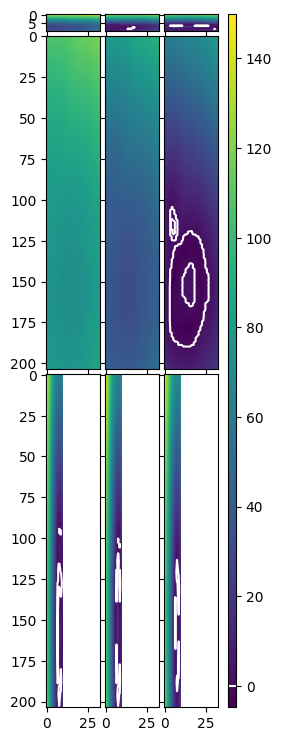

In [9]:
test_arr = (204, 10, -33)
cube_xyz = space.patient009.sampling_grid(test_arr)
cube_std = space.patient009.surface_xyz2sdt(cube_xyz)
cube_std = cube_std[:, :, :, 0]
nndt.save_3D_slices(cube_std, "./viz1.png", include_boundary=False)

Invalid shape (33,) for image data


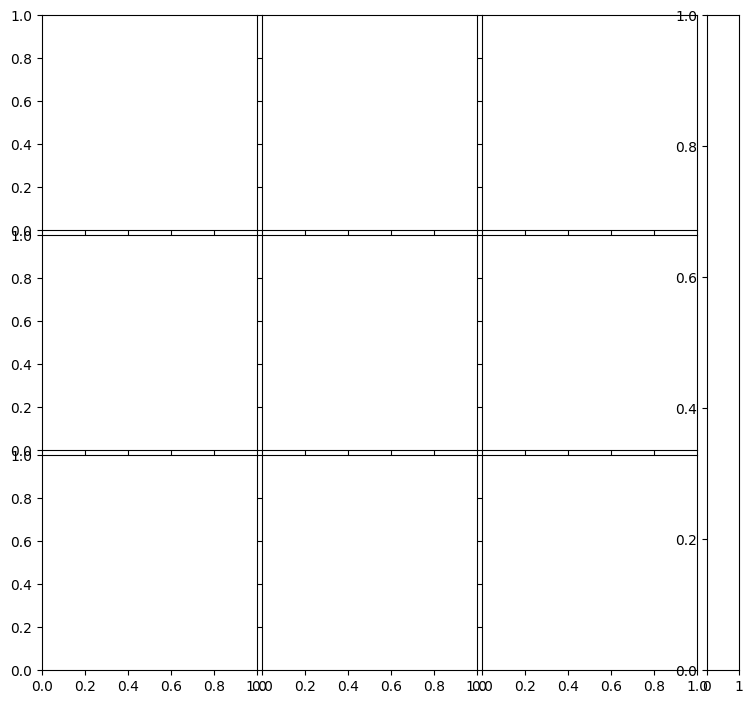

In [12]:
test_arr = (204, 1, 33)
cube_xyz = space.patient009.sampling_grid(test_arr)
cube_std = space.patient009.surface_xyz2sdt(cube_xyz)
cube_std = cube_std[:, :, :, 0]
try:
    nndt.save_3D_slices(cube_std, "./viz1.png", include_boundary=False)
except TypeError as err:
    print(err)

/home/simus/.local/lib/python3.10/site-packages/nndt/vizualize.py:149: UserWarning: No contour levels were found within the data range.
  _cs2 = ax.contour(
/home/simus/.local/lib/python3.10/site-packages/nndt/vizualize.py:163: UserWarning: No contour levels were found within the data range.
  _cs2 = ax.contour(


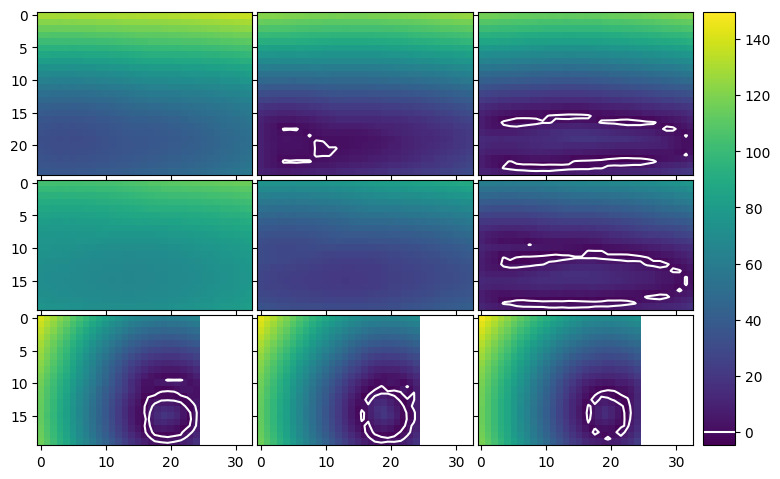

In [13]:
test_arr = (20, -25, 33)
cube_xyz = space.patient009.sampling_grid(test_arr)
cube_std = space.patient009.surface_xyz2sdt(cube_xyz)
cube_std = cube_std[:, :, :, 0]
nndt.save_3D_slices(cube_std, "./viz1.png", include_boundary=False)

Examples for `save_3D_slices` with RGB/RGBA colors

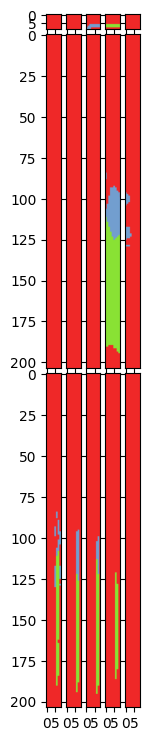

In [14]:
test_arr = (204, 9, -33)
cube_xyz = space.patient009.sampling_grid(test_arr)
cube_rgba = space.patient009.surface_xyz2rgba(cube_xyz)
cube_rgba = cube_rgba
nndt.save_3D_slices(cube_rgba, include_boundary=True)

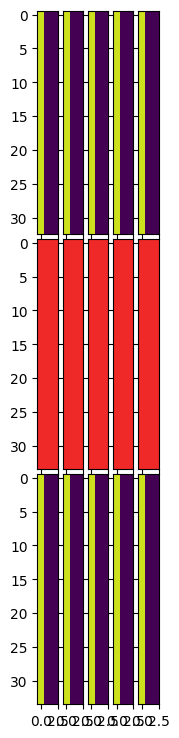

In [15]:
test_arr = (34, 1, 33)
cube_xyz = space.patient009.sampling_grid(test_arr)
cube_rgba = space.patient009.surface_xyz2rgba(cube_xyz)
cube_rgba = cube_rgba
nndt.save_3D_slices(cube_rgba, include_boundary=True)

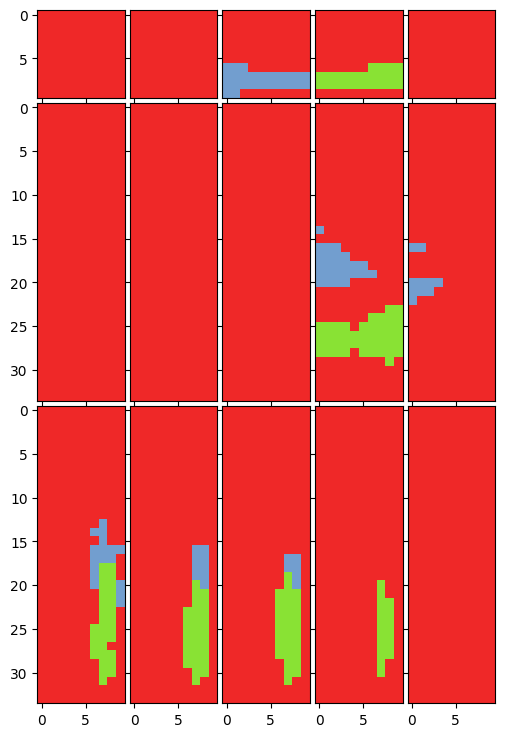

In [16]:
test_arr = (34, 10, 33)
cube_xyz = space.patient009.sampling_grid(test_arr)
cube_rgba = space.patient009.surface_xyz2rgba(cube_xyz)
cube_rgba = cube_rgba
nndt.save_3D_slices(cube_rgba, include_boundary=True)

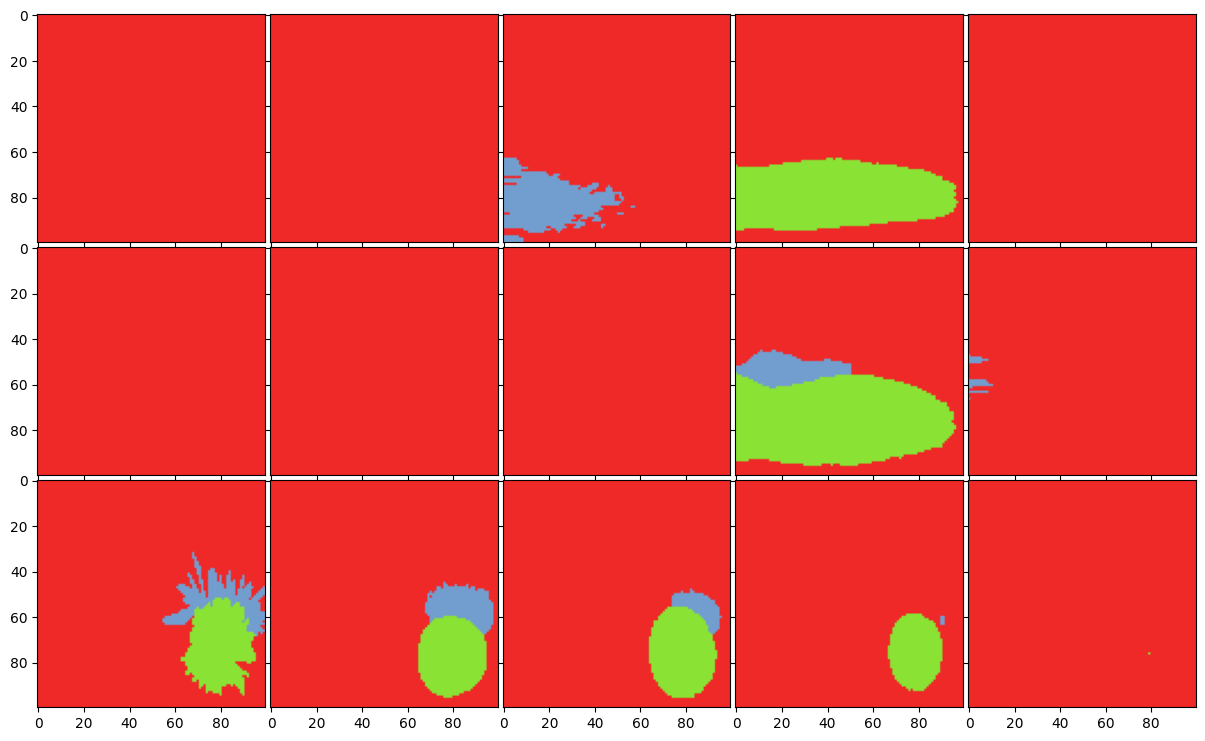

In [18]:
test_arr = (100, 100, 100)
cube_xyz = space.patient009.sampling_grid(test_arr)
cube_rgba = space.patient009.surface_xyz2rgba(cube_xyz)
cube_rgba = cube_rgba
nndt.save_3D_slices(cube_rgba, include_boundary=True)